In [4]:
%matplotlib inline

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df_new = pd.read_csv('df_new.csv', index_col=0)
df_new.head()

,word,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,web_corpus_freq
1,abbey,5,1.767767,5.781,4.667,5.906,5.344,3.324,5.177,5.121,3.303,0,22.010473
2,abbreviate,10,1.809143,5.250,5.235,3.286,3.177,5.121,5.543,2.667,3.971,0,17.096149
3,abdicate,8,2.047926,3.767,4.419,3.367,2.516,3.971,6.233,4.679,5.167,0,16.921411
4,abdication,10,1.961122,3.880,4.800,3.292,2.571,3.097,6.407,5.083,4.571,0,16.967395
5,abdomen,7,2.171175,5.486,5.441,6.606,6.235,4.636,5.457,3.529,4.600,0,20.507543


In [6]:
df_new.dtypes

word                object
length               int64
arousal            float64
valence            float64
dominance          float64
concreteness       float64
imageability       float64
familiarity        float64
aoa                float64
semsize            float64
gender             float64
polysemy             int64
web_corpus_freq    float64
dtype: object

In [7]:
cols = [col for col in df_new.columns if col != 'word']    
cols = [col for col in cols if col != 'polysemy']          
cols = [col for col in cols if col != 'concreteness']      
cols = [col for col in cols if col != 'dominance']         
cols = [col for col in cols if col != 'familiarity']       
cols

['length',
 'arousal',
 'valence',
 'imageability',
 'aoa',
 'semsize',
 'gender',
 'web_corpus_freq']

In [8]:
###### Lecture Pipeline ######
# you can/have to modify the order for your project,
# e.g. hyperparameter tuning before evaluating a decision tree

# Hold-out
from sklearn.model_selection import train_test_split

# Decision Tree
from sklearn.tree import DecisionTreeClassifier
# Optional: KNN
from sklearn.neighbors import KNeighborsClassifier

##### Decision Tree Visualization #####
from sklearn import tree # export_graphviz() method
from IPython.display import Image # viz stuff
import pydotplus # viz stuff                     ## install
from IPython.display import Image # viz stuff

####################################

######## Evaluation #######                
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Optional: baseline comparison
from sklearn.dummy import DummyClassifier
####################################

# hyperparameter tuning ## To search for the most suitable parameters for the Decision Tree
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# cross-validation ## hold-out method alternative
from sklearn.model_selection import cross_val_score

# Train & Test

## Balanced Data


In [9]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

undersample = RandomUnderSampler(sampling_strategy='majority') 
oversample = RandomOverSampler(random_state=42) # (sampling_strategy=0.5)    

In [10]:
# Hold-out

X = df_new[cols].values
y = df_new['polysemy']

X_training, X_test, y_training, y_test = train_test_split(X, y, test_size = 0.3, stratify= y, 
                                        random_state = 100 ) #because it is a random split

X_over, y_over = oversample.fit_resample(X_training, y_training)

X_train, X_val, y_train, y_val = train_test_split(X_over, y_over, test_size = 0.3, 
                                                  random_state= 100, stratify = y_over)

print("df_new.shape :     ",df_new.shape)

print('-------------------------------------------')
print('Training Set')
print("X_train_or.shape : ",X_training.shape)

print('-------------------------------------------')
print('Test Set')
print("X_test.shape :     ",X_test.shape)

print('-------------------------------------------')
print('Training Set Count')
print('X iniziale: -------', X_training.shape, '\n y iniziale:', Counter(y_training))

print('-------------------------------------------')
print('Oversampled Training Set Count')
print('X over:------------', X_over.shape, '\n y over:    ', Counter(y_over))

print('-------------------------------------------')
print('Train Set')
print("X_train.shape :    ",X_train.shape)
print('X_train count: -------', X_train.shape, '\n y count:', Counter(y_train))

print('-------------------------------------------')
print('Validation Set')
print("X_val.shape :      ",X_val.shape)
print('X_val count: -------', X_val.shape, '\n y count:', Counter(y_val))


df_new.shape :      (4357, 13)
-------------------------------------------
Training Set
X_train_or.shape :  (3049, 8)
-------------------------------------------
Test Set
X_test.shape :      (1308, 8)
-------------------------------------------
Training Set Count
X iniziale: ------- (3049, 8) 
 y iniziale: Counter({0: 2789, 1: 260})
-------------------------------------------
Oversampled Training Set Count
X over:------------ (5578, 8) 
 y over:     Counter({1: 2789, 0: 2789})
-------------------------------------------
Train Set
X_train.shape :     (3904, 8)
X_train count: ------- (3904, 8) 
 y count: Counter({0: 1952, 1: 1952})
-------------------------------------------
Validation Set
X_val.shape :       (1674, 8)
X_val count: ------- (1674, 8) 
 y count: Counter({1: 837, 0: 837})


In [11]:
len(df_new), X_train.shape[0], X_test.shape[0]

(4357, 3904, 1308)

In [12]:
df_new.shape,df_new[cols].shape, X_train.shape, X_test.shape

((4357, 13), (4357, 8), (3904, 8), (1308, 8))

# Tuning the hyper-parameters

In [13]:
clf = DecisionTreeClassifier(#criterion='gini',
                             #max_depth=None ,
                             #min_samples_split=10,
                             #min_samples_leaf=5,
                            ) 
clf.fit(X_train, y_train)  ## on train set only
#clf.fit(X_train_or, y_train_or) ?

DecisionTreeClassifier()

In [14]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [15]:
param_list = {'max_depth': [None] + list(np.arange(2, 20)),    
             'min_samples_split': [2, 5, 10, 20, 30, 50, 100],
             'min_samples_leaf': [1, 5, 10, 20, 30, 50, 100], 
             'criterion': ['gini', 'entropy']
             }

In [16]:
grid_search = GridSearchCV(clf, param_grid=param_list, scoring='f1')
grid_search.fit(X_train, y_train) ##### ASK !!
res = grid_search.cv_results_

In [17]:
report(res, n_top=3)
# ________Result_________
# Model with rank: 1
# Mean validation score: 0.945 (std: 0.007)
# Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}

Model with rank: 1
Mean validation score: 0.942 (std: 0.007)
Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}

Model with rank: 2
Mean validation score: 0.938 (std: 0.010)
Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}

Model with rank: 3
Mean validation score: 0.938 (std: 0.008)
Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}



In [18]:
#grid_search.best_estimator_ # !!!!!!!!!!!!!!!!!!!!!!!!!!!

In [19]:
random_search = RandomizedSearchCV(clf, param_distributions=param_list, n_iter=50, cv=4, random_state=42)
random_search.fit(X_train, y_train) 
res = grid_search.cv_results_

In [20]:
report(res, n_top=3)
# ________Result_________
# Model with rank: 1
# Mean validation score: 0.886 (std: 0.008)
# Parameters: {'min_samples_split': 10, 'min_samples_leaf': 5, 'max_depth': None, 'criterion': 'entropy'}

Model with rank: 1
Mean validation score: 0.942 (std: 0.007)
Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}

Model with rank: 2
Mean validation score: 0.938 (std: 0.010)
Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}

Model with rank: 3
Mean validation score: 0.938 (std: 0.008)
Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}



In [21]:
#random_search.best_estimator_ # !!!!!!!!!!!!!!!!!!!!!!!!!!!

# Decision tree - build model

In [22]:
### decided by RandomizedSearchCV
clf = DecisionTreeClassifier(criterion='entropy', max_depth= None, min_samples_split=10, min_samples_leaf=5) 

# use GINI or ENTROPY to decide the split method (there are others but sklearn only has these)
# max_depth: at what level the tree should stop
# min_samples_split: minimum number of records in a node for it to be convenient to split
# min_samples_leaf: minimum number of records acceptable in children to be convenient for splitting

clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=5,
                       min_samples_split=10)

In [23]:
clf.feature_importances_

array([0.15786509, 0.13287521, 0.09344031, 0.0740221 , 0.09352424,
       0.13932612, 0.1065943 , 0.20235264])

In [24]:
imp_dict = {attr: clf.feature_importances_[i] for i, attr in enumerate(cols)}
imp_dict

{'length': 0.1578650857914122,
 'arousal': 0.132875207564363,
 'valence': 0.0934403104082735,
 'imageability': 0.07402209662984315,
 'aoa': 0.09352424117162496,
 'semsize': 0.1393261183165452,
 'gender': 0.10659429887192103,
 'web_corpus_freq': 0.20235264124601696}

In [25]:
# Order by Importance
{k: v for k, v in sorted(imp_dict.items(), key=lambda item: item[1], reverse=True)} 

{'web_corpus_freq': 0.20235264124601696,
 'length': 0.1578650857914122,
 'semsize': 0.1393261183165452,
 'arousal': 0.132875207564363,
 'gender': 0.10659429887192103,
 'aoa': 0.09352424117162496,
 'valence': 0.0934403104082735,
 'imageability': 0.07402209662984315}

Text(0.5, 1.0, 'Feature Importance')

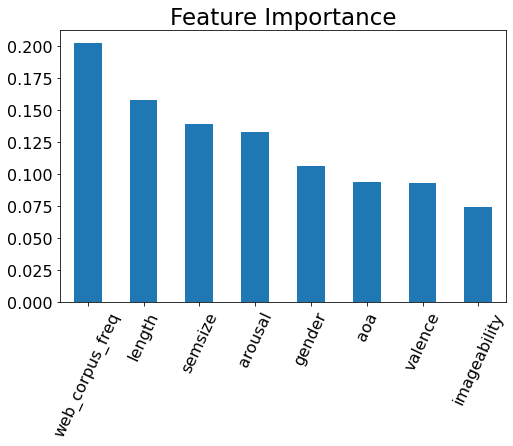

In [26]:
pd.Series(clf.feature_importances_,  
         index = cols).sort_values(ascending = False).plot(kind = 'bar', figsize = (8,5), fontsize = 16, rot = 65);
plt.title('Feature Importance', fontsize = 23)
#plt.savefig(os.path.join('FeatureImportance.png'), dpi=300, format='png', bbox_inches='tight')

In [27]:
clf.classes_ # polysemy 0 and 1

array([0, 1], dtype=int64)

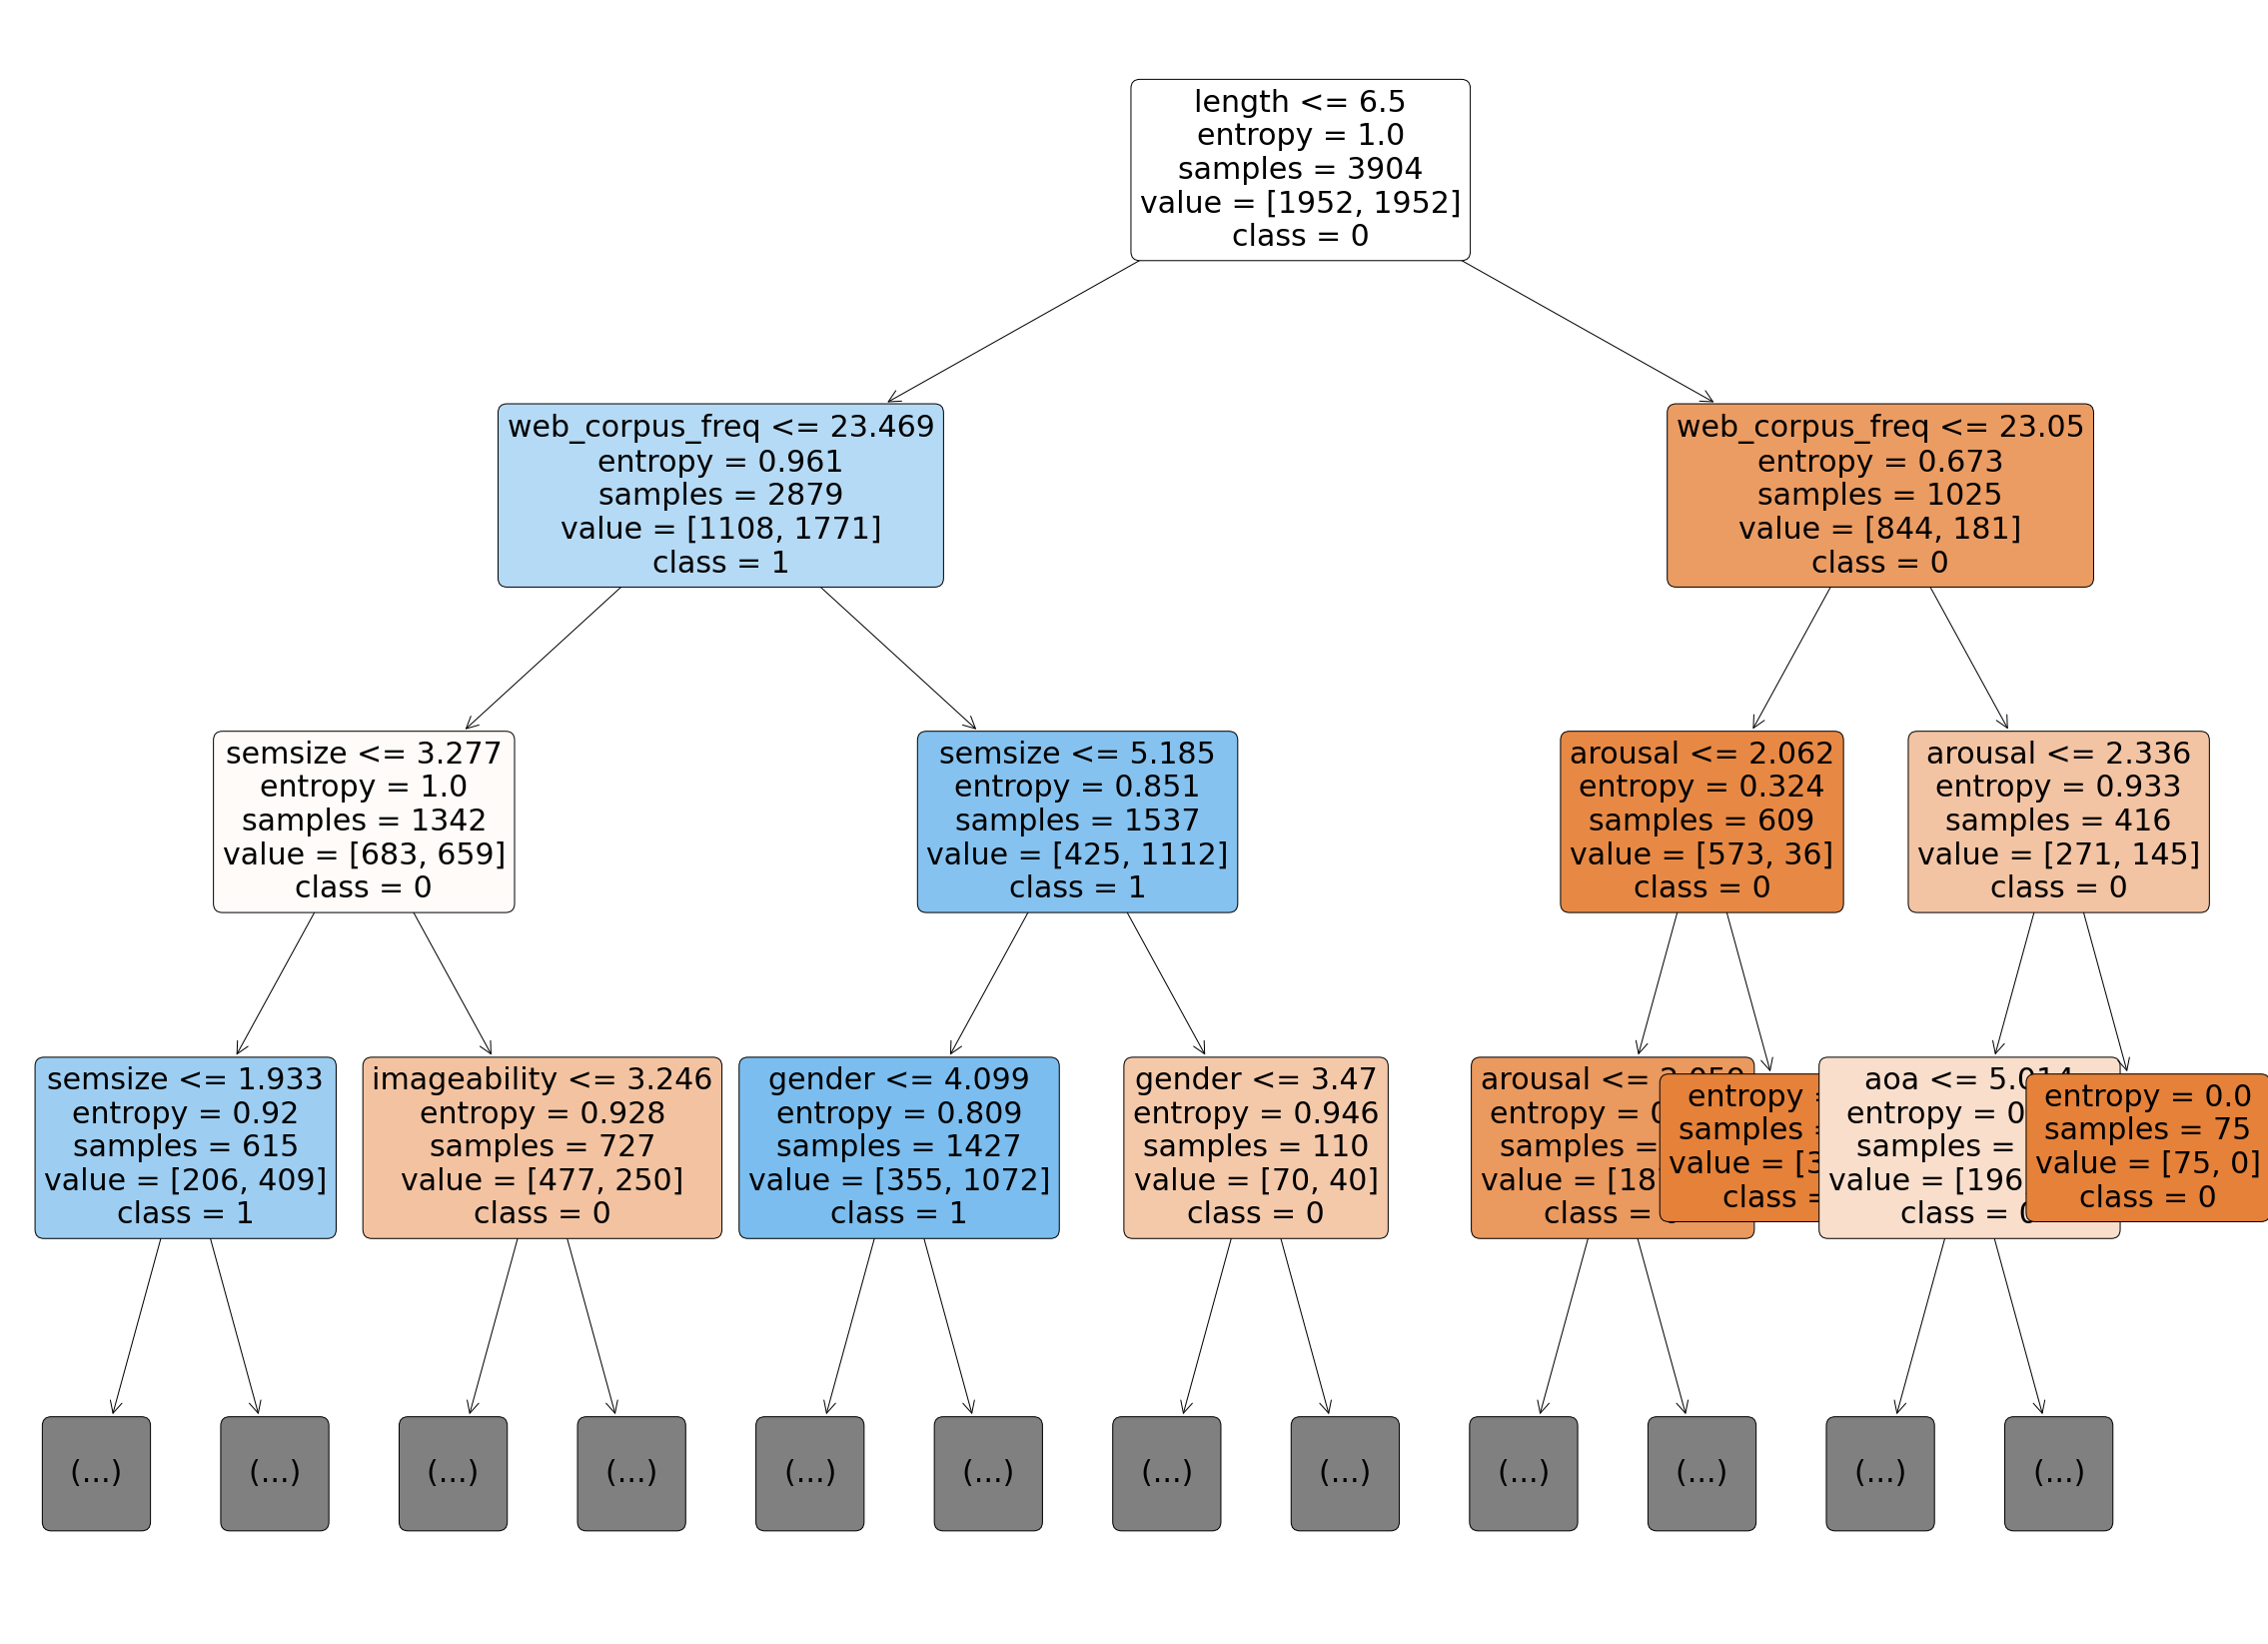

In [28]:
fig, ax = plt.subplots(figsize=(40, 30))    

tree.plot_tree                 (clf,               # this is for the following plot
                                feature_names= cols, 
                                class_names=[str(v) for v in clf.classes_], 
                                filled=True, rounded=True,  
                                impurity= True ,
                                fontsize = 30,  # change this to change fontsize in the node
                                max_depth=3)    # change this value to change the level of tree
plt.show()

In [29]:
from graphviz import Digraph
import pydotplus
#from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import graphviz

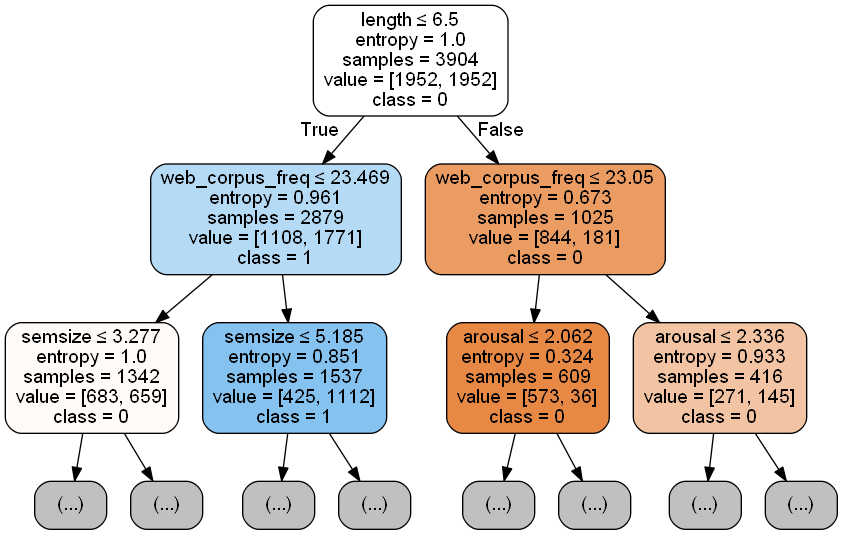

In [62]:
dot_data = tree.export_graphviz (clf, out_file=None,
                                feature_names=cols,
                                class_names=[str(v) for v in clf.classes_],
                                filled=True, rounded=True,
                                special_characters=True,
                                #fontsize = 30,
                                max_depth=2
                                )

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())
#plt.savefig(os.path.join('DecisionTree.png'), dpi=300, format='png', bbox_inches='tight')

# MODEL EVALUATION

## ACCURACY

In [31]:
y_pred = clf.predict(X_train)
y_pred_val = clf.predict(X_val)
y_pred_test = clf.predict(X_test)
y_pred[:5], y_pred_val[:5], y_pred_test[:5]

(array([0, 0, 1, 1, 1], dtype=int64),
 array([1, 1, 0, 0, 1], dtype=int64),
 array([0, 0, 0, 0, 0], dtype=int64))

In [32]:
y_train.values[:5], y_val.values[:5], y_test.values[:5]

(array([0, 0, 1, 1, 1], dtype=int64),
 array([1, 1, 0, 0, 1], dtype=int64),
 array([1, 0, 0, 0, 0], dtype=int64))

In [33]:
# predict probability 
y_pred_prob = clf.predict_proba(X_train)
y_pred_prob_val = clf.predict_proba(X_val)
y_pred_prob_test = clf.predict_proba(X_test)
y_pred_prob[:5], y_pred_prob_val[:5], y_pred_prob_test[:5]

(array([[1., 0.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [0., 1.]]),
 array([[0., 1.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [0., 1.]]),
 array([[1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.]]))

###  ALL - Train/Val/Test

In [34]:
print('DT Classifier')
print('_________________________________________________________________')
print('TRAIN Accuracy', accuracy_score(y_train, y_pred))
print('TRAIN F1-score', f1_score(y_train, y_pred, average=None))
print('TRAIN F1-score', f1_score(y_train, y_pred))
print( classification_report(y_train, y_pred) )
confusion_matrix(y_train, y_pred, labels=[1,0])

print('_________________________________________________________________')
print('VALIDATION Accuracy %s' % accuracy_score(y_val, y_pred_val))
print('VALIDATION F1-score %s' % f1_score(y_val, y_pred_val, average=None))
print(classification_report(y_val, y_pred_val))
confusion_matrix(y_val, y_pred_val, labels=[1,0])

print('_________________________________________________________________')
print('TEST Accuracy %s' % accuracy_score(y_test, y_pred_test))
print('TEST F1-score %s' % f1_score(y_test, y_pred_test, average=None))
print(classification_report(y_test, y_pred_test))
confusion_matrix(y_test, y_pred_test, labels=[1,0])

confusion_matrix(y_val, y_pred_val)

DT Classifier
_________________________________________________________________
TRAIN Accuracy 0.9725922131147541
TRAIN F1-score [0.97211363 0.97305465]
TRAIN F1-score 0.9730546461848402
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      1952
           1       0.96      0.99      0.97      1952

    accuracy                           0.97      3904
   macro avg       0.97      0.97      0.97      3904
weighted avg       0.97      0.97      0.97      3904

_________________________________________________________________
VALIDATION Accuracy 0.9157706093189965
VALIDATION F1-score [0.91081594 0.92020374]
              precision    recall  f1-score   support

           0       0.97      0.86      0.91       837
           1       0.87      0.97      0.92       837

    accuracy                           0.92      1674
   macro avg       0.92      0.92      0.92      1674
weighted avg       0.92      0.92      0.92      1674

__________

array([[720, 117],
       [ 24, 813]], dtype=int64)

## CONFUSION MATRIX

In [35]:
# SUGGESTED FOR THE PROJECT
#    TP,       FN,        FP,       TN
# cf[0][0], cf[0][1], cf[1][0], cf[1][1]

cf = confusion_matrix(y_train, y_pred, labels=[1,0])
cf

array([[1932,   20],
       [  87, 1865]], dtype=int64)

In [36]:
# to normalize
cf = confusion_matrix(y_train, y_pred, labels=[1,0], normalize='all')
cf

array([[0.49487705, 0.00512295],
       [0.02228484, 0.47771516]])

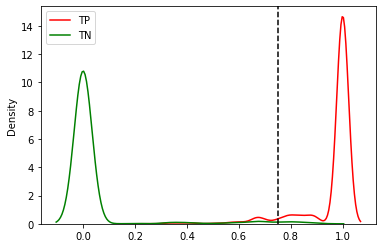

In [37]:
# KDEPLOTS just for understanding how a threshold work:
# green line to the right of the threshold are FPs
# red line to the left of the threshold are FNs

import seaborn as sns

# on TRAIN set
sns.kdeplot(y_pred_prob[:,1][y_train == 1], alpha=0.5, color='red', label='TP')
sns.kdeplot(y_pred_prob[:,1][y_train == 0], alpha=0.5, color='green', label='TN')

# example
threshold = 0.75
plt.axvline(threshold, c='black', ls='dashed')

plt.legend()

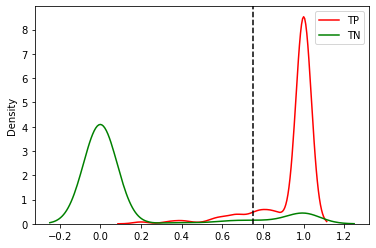

In [38]:
# on VALIDATION set
sns.kdeplot(y_pred_prob_val[:,1][y_val == 1], alpha=0.5, color='red', label='TP')
sns.kdeplot(y_pred_prob_val[:,1][y_val == 0], alpha=0.5, color='green', label='TN')

# example
threshold = 0.75
plt.axvline(threshold, c='black', ls='dashed')

plt.legend()

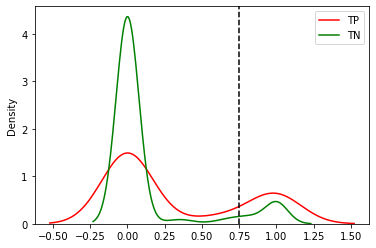

In [39]:
# on TEST set
sns.kdeplot(y_pred_prob_test[:,1][y_test == 1], alpha=0.5, color='red', label='TP')
sns.kdeplot(y_pred_prob_test[:,1][y_test == 0], alpha=0.5, color='green', label='TN')

# example
threshold = 0.75
plt.axvline(threshold, c='black', ls='dashed')

plt.legend()

Confusion matrix, without normalization
[[1932   20]
 [  87 1865]]
Normalized confusion matrix ('all')
[[0.49487705 0.00512295]
 [0.02228484 0.47771516]]
Normalized confusion matrix ('true')
[[0.9897541  0.0102459 ]
 [0.04456967 0.95543033]]


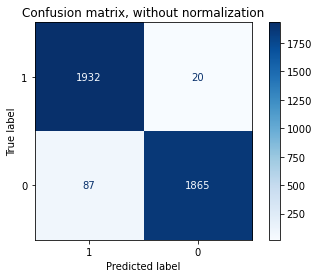

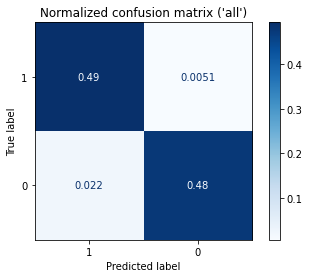

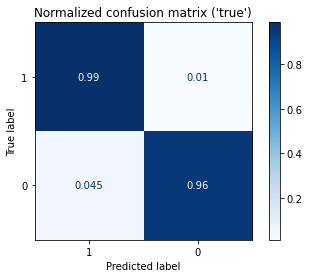

In [40]:
#CONFUSION MATRIX TRAIN SET
from sklearn.metrics import plot_confusion_matrix

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix ('all')", 'all'),
                  ("Normalized confusion matrix ('true')", 'true')]

for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_train, y_train,
                                 display_labels=None,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize,labels=[1,0])
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)

plt.show()

Confusion matrix, without normalization
[[813  24]
 [117 720]]
Normalized confusion matrix ('all')
[[0.48566308 0.01433692]
 [0.06989247 0.43010753]]
Normalized confusion matrix ('true')
[[0.97132616 0.02867384]
 [0.13978495 0.86021505]]


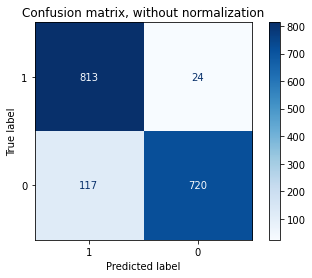

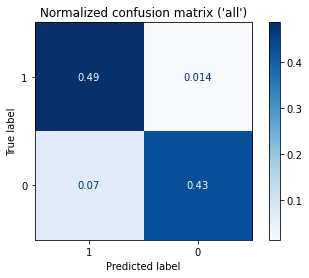

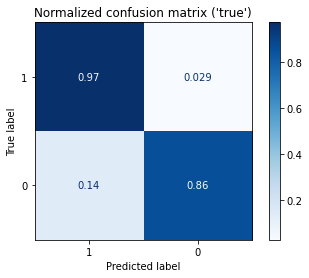

In [41]:
#CONFUSION MATRIX VALIDATION SET
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix ('all')", 'all'),
                  ("Normalized confusion matrix ('true')", 'true')]

for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_val, y_val,
                                 display_labels=None,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize,labels=[1,0])
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)

plt.show()

Confusion matrix, without normalization
[[  38   73]
 [ 163 1034]]
Normalized confusion matrix ('all')
[[0.02905199 0.0558104 ]
 [0.12461774 0.79051988]]
Normalized confusion matrix ('true')
[[0.34234234 0.65765766]
 [0.13617377 0.86382623]]


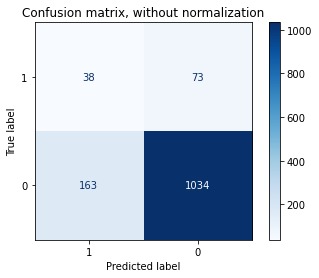

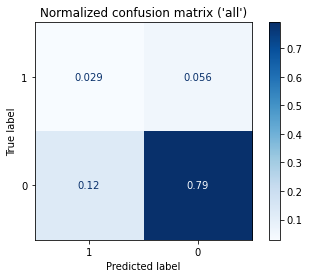

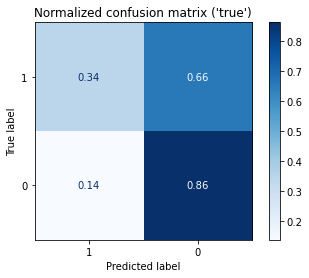

In [42]:
#CONFUSION MATRIX TEST SET
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix ('all')", 'all'),
                  ("Normalized confusion matrix ('true')", 'true')]

for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=None,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize,labels=[1,0])
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)

plt.show()

## ROC CURVES 

In [44]:
from sklearn.preprocessing import LabelBinarizer

In [45]:
# binarizing VALIDATION
lb = LabelBinarizer()
bina_y_val = lb.fit(y_val)
bina_y_pred_val = lb.fit(y_pred_val)
print("Polysemy", lb.classes_.tolist())

bina_y_val = lb.transform(y_val)
bina_y_pred_val = lb.transform(y_pred_val)

fpr, tpr, th = roc_curve(bina_y_val, bina_y_pred_val, pos_label=1)
roc_auc = auc(fpr, tpr)
print(roc_auc)

roc_auc = roc_auc_score(bina_y_val, bina_y_pred_val, average=None)
print("Average:", roc_auc)

Polysemy [0, 1]
0.9157706093189965
Average: 0.9157706093189965


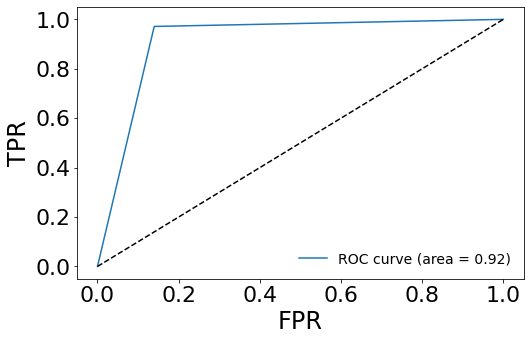

In [46]:
plt.figure(figsize=(8,5))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % (roc_auc))

plt.plot([0,1], [0,1], 'k--')
plt.xlabel('FPR', fontsize=24)
plt.ylabel('TPR', fontsize=24)

plt.tick_params(axis='both', which='major', labelsize=22)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.show()

## Dotted line represents the threshold 

In [47]:
# binarizing TRAIN 
lb = LabelBinarizer()
bina_y_train = lb.fit(y_train)
bina_y_pred_train = lb.fit(y_pred)
print("Polysemy", lb.classes_.tolist())

bina_y_train = lb.transform(y_train)
bina_y_pred_train = lb.transform(y_pred)

fpr, tpr, th = roc_curve(bina_y_train, bina_y_pred_train, pos_label=1)
roc_auc = auc(fpr, tpr)
print(roc_auc)

roc_auc = roc_auc_score(bina_y_train, bina_y_pred_train, average=None)
print("Average:", roc_auc)

Polysemy [0, 1]
0.9725922131147542
Average: 0.9725922131147542


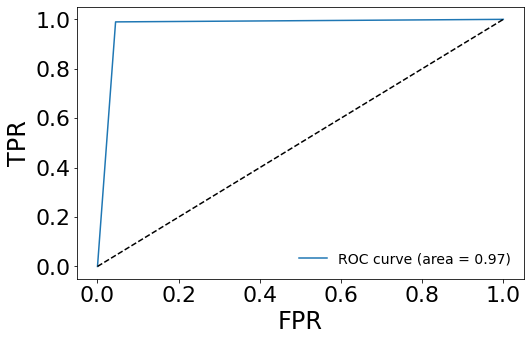

In [48]:
plt.figure(figsize=(8,5))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % (roc_auc))

plt.plot([0,1], [0,1], 'k--')
plt.xlabel('FPR', fontsize=24)
plt.ylabel('TPR', fontsize=24)

plt.tick_params(axis='both', which='major', labelsize=22)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.show()

In [47]:
# binarizing TEST
lb = LabelBinarizer()
bina_y_test = lb.fit(y_test)
bina_y_pred_test = lb.fit(y_pred_test)
print("Polysemy", lb.classes_.tolist())

bina_y_test = lb.transform(y_test)
bina_y_pred_test = lb.transform(y_pred_test)

fpr, tpr, th = roc_curve(bina_y_test, bina_y_pred_test, pos_label=1)
roc_auc = auc(fpr, tpr)
print(roc_auc)

roc_auc = roc_auc_score(bina_y_test, bina_y_pred_test, average=None)
print("Average:", roc_auc)

Polysemy [0, 1]
0.5911513016776175
Average: 0.5911513016776175


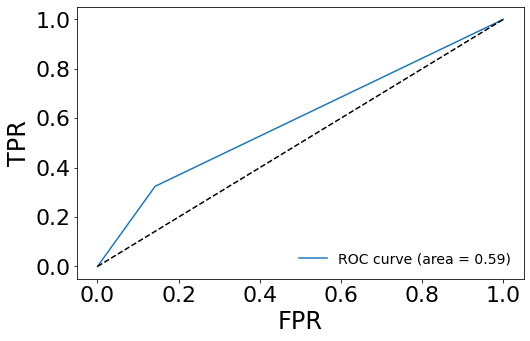

In [48]:
plt.figure(figsize=(8,5))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % (roc_auc))

plt.plot([0,1], [0,1], 'k--')
plt.xlabel('FPR', fontsize=24)
plt.ylabel('TPR', fontsize=24)

plt.tick_params(axis='both', which='major', labelsize=22)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.show()

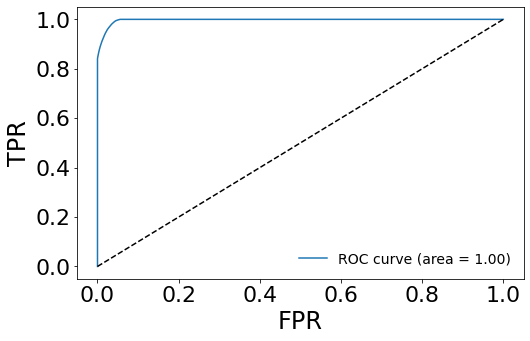

In [49]:
# on TRAIN set
fpr, tpr, th = roc_curve(y_train, y_pred_prob[:,1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,5))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % (roc_auc))

plt.plot([0,1], [0,1], 'k--')
plt.xlabel('FPR', fontsize=24)
plt.ylabel('TPR', fontsize=24)

plt.tick_params(axis='both', which='major', labelsize=22)
plt.legend(loc="lower right", fontsize=14, frameon=False)

plt.show()

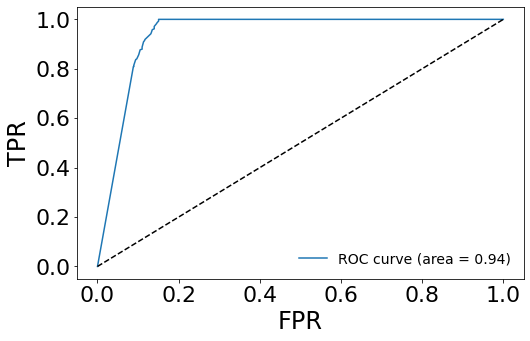

In [49]:
# on VALIDATION set
fpr, tpr, th = roc_curve(y_val, y_pred_prob_val[:,1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,5))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % (roc_auc))

plt.plot([0,1], [0,1], 'k--')
plt.xlabel('FPR', fontsize=24)
plt.ylabel('TPR', fontsize=24)

plt.tick_params(axis='both', which='major', labelsize=22)
plt.legend(loc="lower right", fontsize=14, frameon=False)

plt.show()

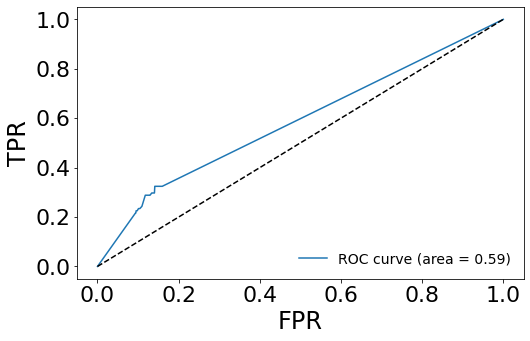

In [51]:
# on TEST set
fpr, tpr, th = roc_curve(y_test, y_pred_prob_test[:,1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,5))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % (roc_auc))

plt.plot([0,1], [0,1], 'k--')
plt.xlabel('FPR', fontsize=24)
plt.ylabel('TPR', fontsize=24)

plt.tick_params(axis='both', which='major', labelsize=22)
plt.legend(loc="lower right", fontsize=14, frameon=False)

plt.show()

# BONUS - CONFUSION MATRIX movie

[[0.5 0. ]
 [0.5 0. ]]


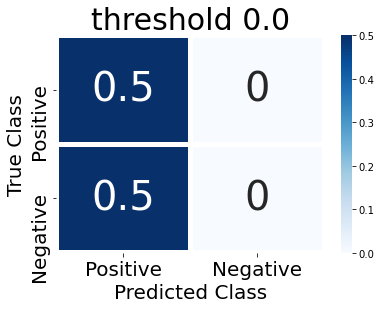

[[0.5        0.        ]
 [0.02920082 0.47079918]]


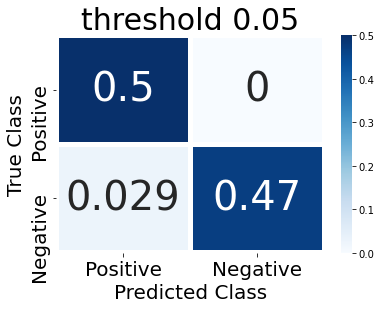

[[0.5        0.        ]
 [0.02920082 0.47079918]]


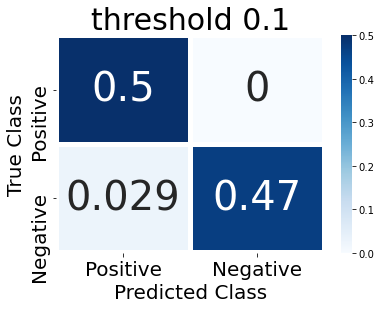

[[0.5        0.        ]
 [0.02920082 0.47079918]]


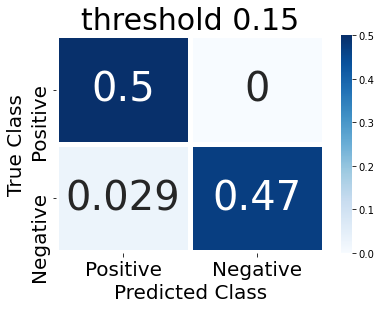

[[0.5        0.        ]
 [0.02920082 0.47079918]]


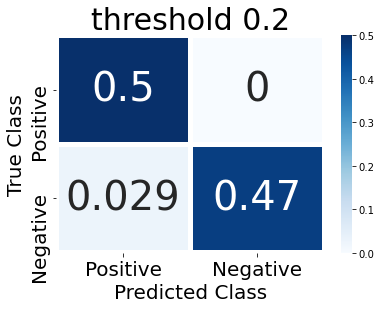

[[4.99743852e-01 2.56147541e-04]
 [2.81762295e-02 4.71823770e-01]]


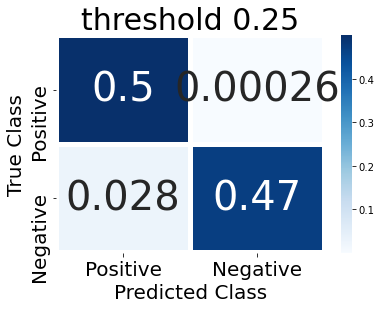

[[4.99743852e-01 2.56147541e-04]
 [2.81762295e-02 4.71823770e-01]]


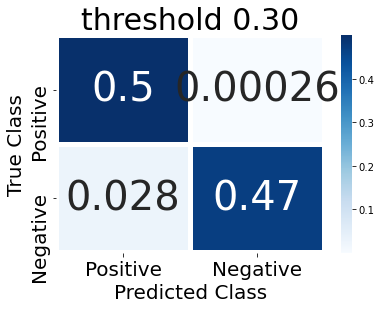

[[0.49820697 0.00179303]
 [0.02510246 0.47489754]]


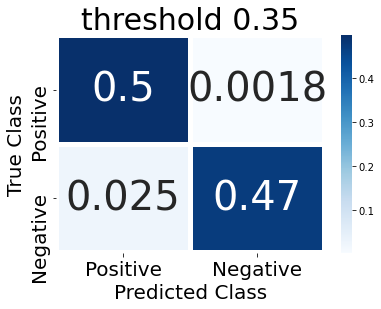

[[0.49820697 0.00179303]
 [0.02510246 0.47489754]]


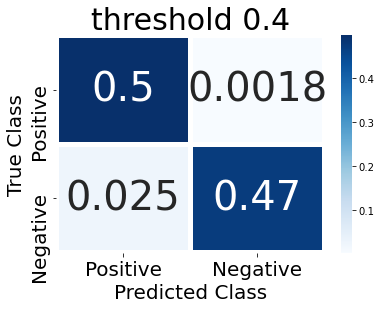

[[0.49641393 0.00358607]
 [0.02254098 0.47745902]]


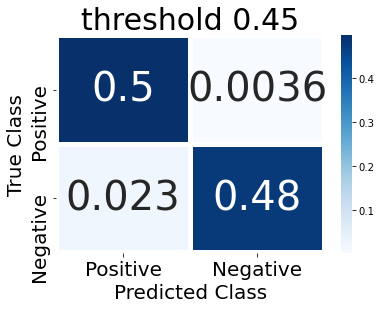

[[0.49641393 0.00358607]
 [0.02254098 0.47745902]]


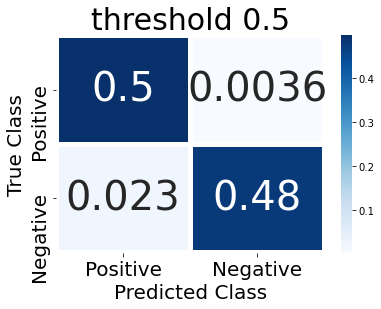

[[0.49564549 0.00435451]
 [0.02177254 0.47822746]]


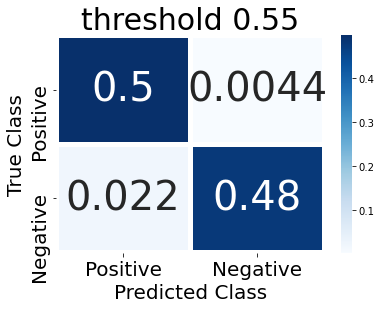

[[0.49154713 0.00845287]
 [0.01895492 0.48104508]]


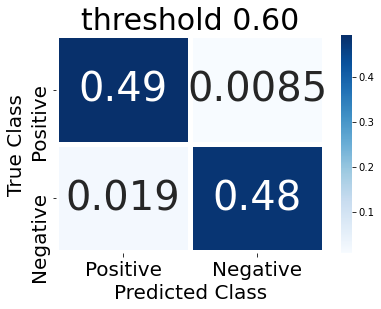

[[0.49026639 0.00973361]
 [0.01818648 0.48181352]]


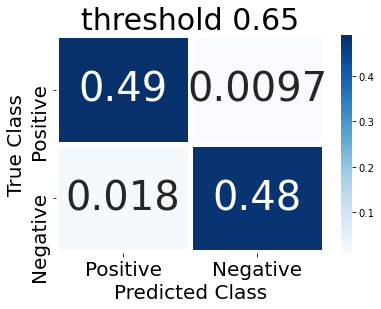

[[0.4741291  0.0258709 ]
 [0.01050205 0.48949795]]


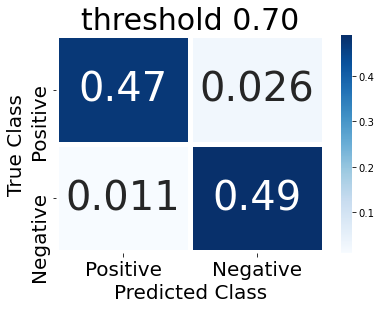

[[0.4741291  0.0258709 ]
 [0.01050205 0.48949795]]


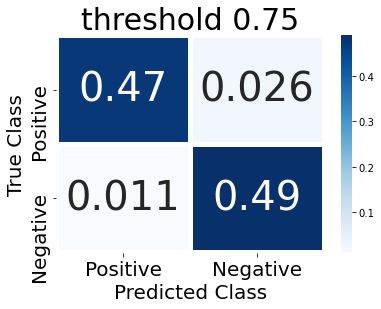

[[0.46593238 0.03406762]
 [0.00794057 0.49205943]]


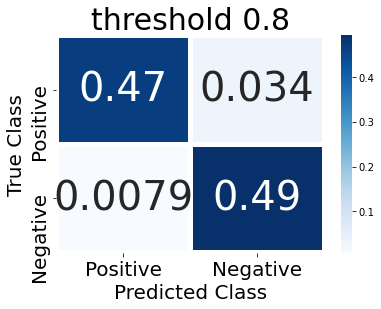

[[0.4423668  0.0576332 ]
 [0.00256148 0.49743852]]


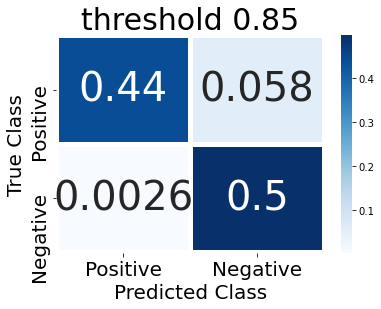

[[0.4272541 0.0727459]
 [0.0005123 0.4994877]]


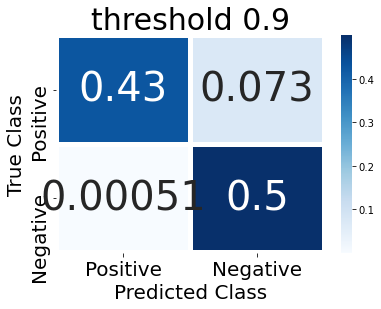

[[0.4223873 0.0776127]
 [0.        0.5      ]]


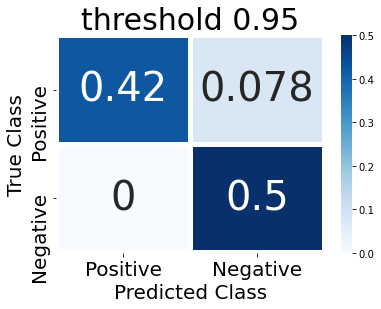

[[0.  0.5]
 [0.  0.5]]


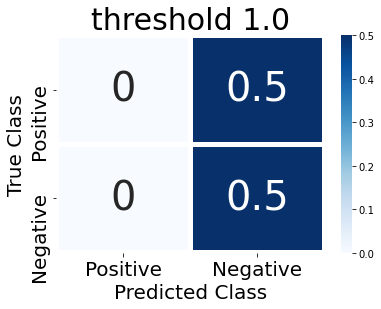

In [58]:
import seaborn as sns
for i, th in enumerate(np.arange(0,1.05,0.05)):
    if th==1:
        y_pred = [1 if v > th else 0 for v in clf.predict_proba(X_train)[:,1]]
    else:
        y_pred = [1 if v >= th else 0 for v in clf.predict_proba(X_train)[:,1]]
    cf = confusion_matrix(y_train, y_pred, labels=[1,0], normalize='all')
    print(cf)
    
    fig, ax = plt.subplots(figsize=(6,4)) 
    sns.heatmap(cf, annot=True, annot_kws={"size": 40}, linewidths=4, cmap="Blues")
    
    ax.set_xticklabels(['Positive','Negative'], fontsize=20)
    ax.set_xlabel('Predicted Class', fontsize=20)
    ax.set_yticklabels(['Positive','Negative'], fontsize=20)
    ax.set_ylabel('True Class', fontsize=20)
    
    plt.title('threshold ' + str(th)[:4], fontsize=30)
    #specify your path
    #plt.savefig(r"C:\Users\user\OneDrive\Desktop\2021-2022\Data Mining\Report\PNGs\Matrix" + str(i) + ".png")
    plt.show()

In [54]:
### # CREATE A GIF OF THE VARYING CONFUSION MATRIX
### 
### import imageio
### 
### filenames = []
### for i, th in enumerate(np.arange(0,1.05,0.05)):
###     #specify your path
###     filename = r"C:\Users\user\OneDrive\Desktop\2021-2022\Data Mining\Report\PNGs\Matrix" + str(i) + ".png"
###     filenames.append(filename)
### 
### images = []
### for filename in filenames:
###     images.append(imageio.imread(filename))
###     
### imageio.mimsave('movie.mp4', images, fps=1.5)

## CROSS VALIDATION

In [59]:
# Training Set
scores_cross = cross_val_score(clf, X_training, y_training, cv=4, scoring='f1')
scores_cross.mean(), scores_cross.std()

(0.1688655910442744, 0.03435814226473086)

In [75]:
# On the initial train (total) set
scores_accuracy_cross = cross_val_score(clf, X_train, y_train, cv=4)
print('TRAIN Accuracy: %0.4f (+/- %0.2f)' % (scores_accuracy_cross.mean(), scores_accuracy_cross.std() * 2))

scores_f1_cross = cross_val_score(clf, X_train, y_train, cv=4, scoring='f1_macro')
print('TRAIN F1-score: %0.4f (+/- %0.2f)' % (scores_f1_cross.mean(), scores_f1_cross.std() * 2))

# On the initial training set
scores_accuracy_cross = cross_val_score(clf, X_training, y_training, cv=4)
print('TRAINING Accuracy: %0.4f (+/- %0.2f)' % (scores_accuracy_cross.mean(), scores_accuracy_cross.std() * 2))

scores_f1_cross = cross_val_score(clf, X_training, y_training, cv=4, scoring='f1_macro')
print('TRAINING F1-score: %0.4f (+/- %0.2f)' % (scores_f1_cross.mean(), scores_f1_cross.std() * 2))

TRAIN Accuracy: 0.8868 (+/- 0.02)
TRAIN F1-score: 0.8844 (+/- 0.01)
TRAINING Accuracy: 0.8695 (+/- 0.02)
TRAINING F1-score: 0.5600 (+/- 0.04)


In [76]:
scores_accuracy_cross

array([0.88204456, 0.86089239, 0.86351706, 0.87139108])

In [62]:
scores_f1_cross

array([0.88984977, 0.88907597, 0.87672565, 0.88483921])

## LEARNING CURVE

In [37]:
from sklearn.metrics import mean_squared_error as mse

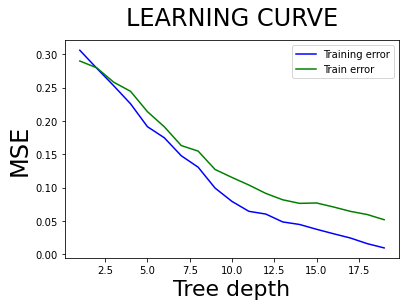

In [54]:
bina_y = lb.transform(y_training)
bina_y_train = lb.transform(y_train)

max_depths = range(1, 20)
training_error = []
for max_depth in max_depths:
    model_1 = DecisionTreeClassifier(max_depth=max_depth, random_state=100)
    model_1.fit(X_train, bina_y_train)
    training_error.append(mse(bina_y_train, model_1.predict(X_train)))
    
testing_error = []
for max_depth in max_depths:
    model_2 = DecisionTreeClassifier(max_depth=max_depth, random_state=100)
    model_2.fit(X_train, bina_y_train)
    testing_error.append(mse(bina_y_val, model_2.predict(X_val)))

plt.plot(max_depths, training_error, color='blue', label='Training error')
plt.plot(max_depths, testing_error, color='green', label='Train error')
plt.xlabel('Tree depth', fontsize = 22)
plt.ylabel('MSE', fontsize = 24) # Mean squared error
plt.title('LEARNING CURVE', pad=15, size=24)
#plt.axvline(x=11, color='orange', linestyle='--')
plt.legend()

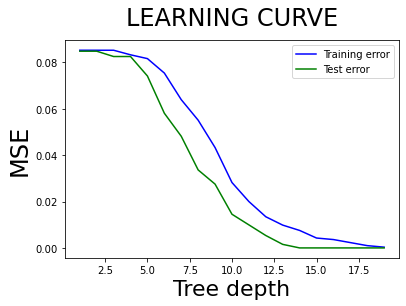

In [55]:
bina_y = lb.transform(y_training)
bina_y_test = lb.transform(y_test)

max_depths = range(1, 20)
training_error = []
for max_depth in max_depths:
    model_1 = DecisionTreeClassifier(max_depth=max_depth, random_state=100)
    model_1.fit(X_training, bina_y)
    training_error.append(mse(bina_y, model_1.predict(X_training)))
    
testing_error = []
for max_depth in max_depths:
    model_2 = DecisionTreeClassifier(max_depth=max_depth, random_state=100)
    model_2.fit(X_test, bina_y_test)
    testing_error.append(mse(bina_y_test, model_2.predict(X_test)))

plt.plot(max_depths, training_error, color='blue', label='Training error')
plt.plot(max_depths, testing_error, color='green', label='Test error')
plt.xlabel('Tree depth', fontsize = 22)
plt.ylabel('MSE', fontsize = 24) # Mean squared error
plt.title('LEARNING CURVE', pad=15, size=24)
#plt.axvline(x=11, color='orange', linestyle='--')
plt.legend()

# DUMMY CLASSIFIER

In [99]:
#dummy_clf = DummyClassifier(strategy='constant', constant=1) # strategy = constant = 1 means that I consider threshold = 1
#dummy_clf.fit(X_test, y_test)
#
#y_pred_test_dummy = dummy_clf.predict(X_test)

In [98]:
#cf_dummy = confusion_matrix(y_test, y_pred_test_dummy, labels=[1,0])
#cf_dummy

In [97]:
#print(classification_report(y_test, y_pred_test_dummy))

# Random Forest Classifier

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train)

RandomForestClassifier()

In [52]:
param_list = {'max_depth': [None] + list(np.arange(2, 50)),
              'min_samples_split': [10, 15, 20, 30, 50, 100, 150],
              'min_samples_leaf': [5, 10, 15, 20, 30, 50, 100, 150],
              'criterion': ['gini', 'entropy']}

In [53]:
random_search = RandomizedSearchCV(clf_rf, param_distributions=param_list, n_iter=100, cv=4)
random_search.fit(X_train, y_train)
report(random_search.cv_results_, n_top=3)

# ______RESULT______
# Model with rank: 1
# Mean validation score: 0.932 (std: 0.010)
# Parameters: {'min_samples_split': 10, 'min_samples_leaf': 5, 'max_depth': 46, 'criterion': 'entropy'}

Model with rank: 1
Mean validation score: 0.932 (std: 0.010)
Parameters: {'min_samples_split': 10, 'min_samples_leaf': 5, 'max_depth': 46, 'criterion': 'entropy'}

Model with rank: 2
Mean validation score: 0.927 (std: 0.010)
Parameters: {'min_samples_split': 10, 'min_samples_leaf': 5, 'max_depth': 45, 'criterion': 'gini'}

Model with rank: 3
Mean validation score: 0.912 (std: 0.009)
Parameters: {'min_samples_split': 20, 'min_samples_leaf': 5, 'max_depth': 42, 'criterion': 'entropy'}



In [80]:
random_search.best_estimator_

RandomForestClassifier(max_depth=28, min_samples_leaf=5, min_samples_split=10)

In [83]:
# Takes a lot of TIME !!!!!!!!
# grid_search = GridSearchCV(clf_rf, param_grid=param_list, scoring='f1')
# grid_search.fit(X_train, y_train) ##### ASK !!
# res = grid_search.cv_results_
# ______RESULT_____

In [84]:
#grid_search.best_estimator_

In [56]:
clf_rf= RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=46,
                               min_samples_split=10, min_samples_leaf=5, class_weight=None)
clf_rf.fit(X_train,y_train)
y_pred_rf = clf_rf.predict(X_train)
y_pred_val_rf = clf_rf.predict(X_val)
y_pred_test_rf = clf_rf.predict(X_test)


print('RF Classifier (depth=46, samples_leaf=5, samples_split=10)')
print('_________________________________________________________________')
print('Train Accuracy %s' % accuracy_score(y_train, y_pred_rf))
print('Train F1-score %s' % f1_score(y_train, y_pred_rf, average=None))
print(classification_report(y_train, y_pred_rf))

print('_________________________________________________________________')
print('Validation Accuracy %s' % accuracy_score(y_val, y_pred_val_rf))
print('Validation F1-score %s' % f1_score(y_val, y_pred_val_rf, average=None))
print(classification_report(y_val, y_pred_val_rf))

print('_________________________________________________________________')
print('Test Accuracy %s' % accuracy_score(y_test, y_pred_test_rf))
print('Test F1-score %s' % f1_score(y_test, y_pred_test_rf, average=None))
print(classification_report(y_test, y_pred_test_rf))

confusion_matrix(y_val, y_pred_val_rf)

RF Classifier (depth=46, samples_leaf=5, samples_split=10)
_________________________________________________________________
Train Accuracy 0.9900102459016393
Train F1-score [0.98995622 0.99006369]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1952
           1       0.98      1.00      0.99      1952

    accuracy                           0.99      3904
   macro avg       0.99      0.99      0.99      3904
weighted avg       0.99      0.99      0.99      3904

_________________________________________________________________
Validation Accuracy 0.9516129032258065
Validation F1-score [0.95003085 0.95309786]
              precision    recall  f1-score   support

           0       0.98      0.92      0.95       837
           1       0.92      0.98      0.95       837

    accuracy                           0.95      1674
   macro avg       0.95      0.95      0.95      1674
weighted avg       0.95      0.95      0.95      1674


array([[770,  67],
       [ 14, 823]], dtype=int64)

Confusion Matrix
[[1943    9]
 [  30 1922]]
Normalized confusion matrix ('all')
[[0.49769467 0.00230533]
 [0.00768443 0.49231557]]
Normalized confusion matrix ('true')
[[0.99538934 0.00461066]
 [0.01536885 0.98463115]]


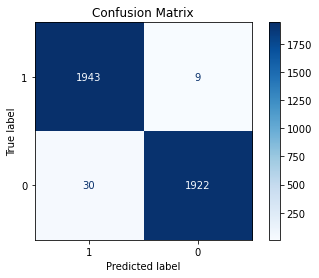

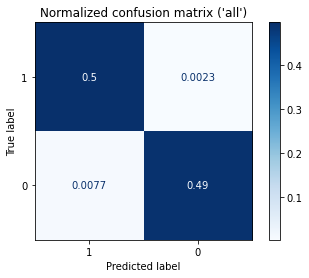

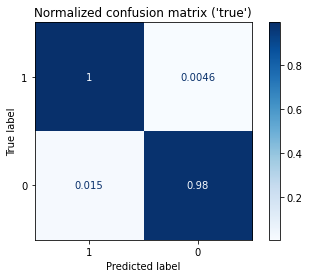

In [59]:
#CONFUSION MATRIX TRAIN
titles_options = [("Confusion Matrix", None),
                  ("Normalized confusion matrix ('all')", 'all'),
                  ("Normalized confusion matrix ('true')", 'true')]

for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf_rf, X_train, y_train,
                                 display_labels=None,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize,labels=[1,0])
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Confusion Matrix
[[823  14]
 [ 67 770]]
Normalized confusion matrix ('all')
[[0.4916368  0.0083632 ]
 [0.04002389 0.45997611]]
Normalized confusion matrix ('true')
[[0.9832736  0.0167264 ]
 [0.08004779 0.91995221]]


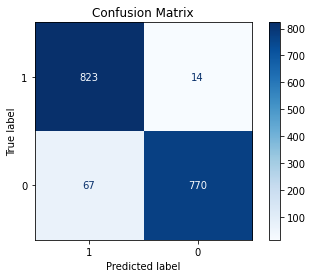

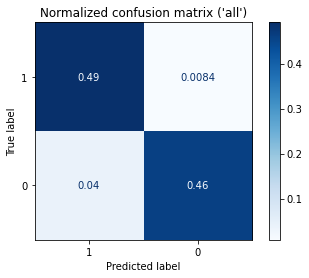

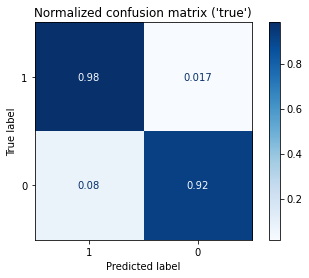

In [60]:
#CONFUSION MATRIX VALIDATION
titles_options = [("Confusion Matrix", None),
                  ("Normalized confusion matrix ('all')", 'all'),
                  ("Normalized confusion matrix ('true')", 'true')]

for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf_rf, X_val, y_val,
                                 display_labels=None,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize,labels=[1,0])
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [63]:
y_score_rf = clf_rf.predict_proba(X_val)
b_y_val = lb.transform(y_val)
b_y_pred = lb.transform(y_pred_val_rf)
fpr, tpr, _ = roc_curve(b_y_val, b_y_pred)
roc_auc = auc(fpr, tpr)
print(roc_auc)

roc_auc = roc_auc_score(b_y_val, b_y_pred, average=None)
roc_auc

0.9516129032258064


0.9516129032258064

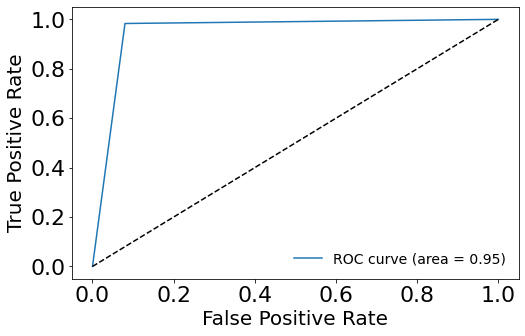

In [64]:
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % (roc_auc))
    
plt.plot([0, 1], [0, 1], 'k--')
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20) 
plt.tick_params(axis='both', which='major', labelsize=22)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.show()

In [67]:
scores_accuracy_rf = cross_val_score(clf_rf, X_train, y_train, cv=4)
print('Accuracy: %0.4f (+/- %0.2f)' % (scores_accuracy_rf.mean(), scores_accuracy_rf.std() * 2))

scores_f1_rf = cross_val_score(clf_rf, X_train, y_train, cv=4, scoring='f1_macro')
print('F1-score: %0.4f (+/- %0.2f)' % (scores_f1_rf.mean(), scores_f1_rf.std() * 2))

Accuracy: 0.9296 (+/- 0.02)
F1-score: 0.9294 (+/- 0.02)


# K Neighbours Classifier (KNN)

In [552]:
#clf = KNeighborsClassifier(n_neighbors=5)
#clf.fit(X, y)

# hold-out, cv, etc...

The optimal number of Neighbours is  1 


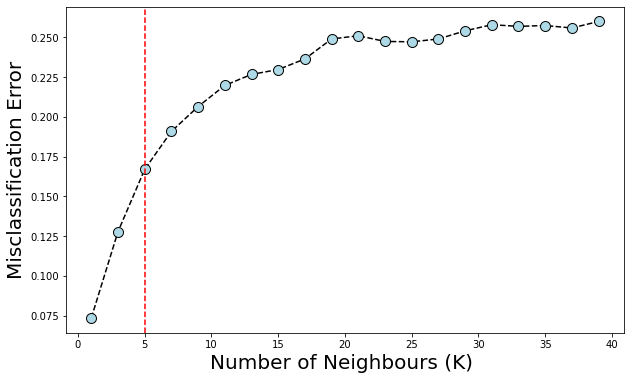

In [73]:
neighbors = []
cv_scores = []  
# perform 10 fold cross validation
for k in range(1, 40, 2):  
    neighbors.append(k)  
    knn = KNeighborsClassifier(n_neighbors = k)  
    scores_kn = cross_val_score(knn, X_train, y_train, cv = 4, scoring = 'accuracy')  
    cv_scores.append(scores_kn.mean()) 
error_rate = [1-x for x in cv_scores]  
    
# determining the best k  
optimal_k = neighbors[error_rate.index(min(error_rate))]  
print('The optimal number of Neighbours is % d ' % optimal_k)  
    
# plot misclassification error versus k  
plt.figure(figsize = (10, 6))  
plt.plot(range(1, 40, 2), error_rate, color ='k', linestyle ='dashed', marker ='o', 
         markerfacecolor ='lightblue', markersize = 10) 
plt.xlabel('Number of Neighbours (K) ', fontsize = 20)  
plt.ylabel('Misclassification Error', fontsize = 20)  
plt.axvline(5, color = "r", linestyle='--')  
plt.show() 

In [76]:
clf_kn = KNeighborsClassifier(n_neighbors=5, weights= 'uniform') 
clf_kn.fit(X_train,y_train)

y_pred_knn = clf_kn.predict(X_train)
y_pred_val_knn = clf_kn.predict(X_val)
y_pred_test_knn = clf_kn.predict(X_test)

print('KNN Classifier (neighbours = 5)')
print('_________________________________________________________________')
print('Train Accuracy %s' % accuracy_score(y_train, y_pred_knn))
print('Train F1-score %s' % f1_score(y_train, y_pred_knn, average=None))
print(classification_report(y_train, y_pred_knn))

print('_________________________________________________________________')
print('Validation Accuracy %s' % accuracy_score(y_val, y_pred_val_knn))
print('Validation F1-score %s' % f1_score(y_val, y_pred_val_knn, average=None))
print(classification_report(y_val, y_pred_val_knn))

print('_________________________________________________________________')
print('Test Accuracy %s' % accuracy_score(y_test, y_pred_test_knn))
print('Test F1-score %s' % f1_score(y_test, y_pred_test_knn, average=None))
print(classification_report(y_test, y_pred_test_knn))


scores_accuracy_kn = cross_val_score(clf_kn, X_training, y_training, cv=4)
print('Accuracy: %0.4f (+/- %0.2f)' % (scores_accuracy_kn.mean(), scores_accuracy_kn.std() * 2))

scores_f1_kn = cross_val_score(clf_kn, X_training, y_training, cv=4, scoring='f1_macro')
print('F1-score: %0.4f (+/- %0.2f)' % (scores_f1_kn.mean(), scores_f1_kn.std() * 2))

KNN Classifier (neighbours = 5)
_________________________________________________________________
Train Accuracy 0.9029200819672131
Train F1-score [0.89284705 0.911262  ]
              precision    recall  f1-score   support

           0       1.00      0.81      0.89      1952
           1       0.84      1.00      0.91      1952

    accuracy                           0.90      3904
   macro avg       0.92      0.90      0.90      3904
weighted avg       0.92      0.90      0.90      3904

_________________________________________________________________
Validation Accuracy 0.8769414575866189
Validation F1-score [0.86062246 0.88983957]
              precision    recall  f1-score   support

           0       0.99      0.76      0.86       837
           1       0.81      0.99      0.89       837

    accuracy                           0.88      1674
   macro avg       0.90      0.88      0.88      1674
weighted avg       0.90      0.88      0.88      1674

__________________________

Confusion matrix, without normalization
[[1946    6]
 [ 373 1579]]
Normalized confusion matrix ('all')
[[0.49846311 0.00153689]
 [0.09554303 0.40445697]]
Normalized confusion matrix ('true')
[[0.99692623 0.00307377]
 [0.19108607 0.80891393]]


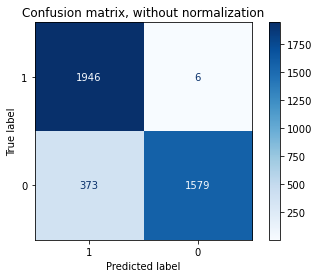

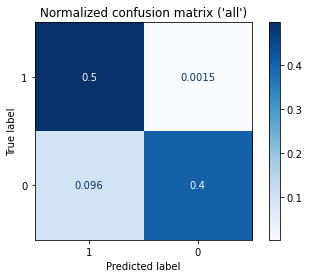

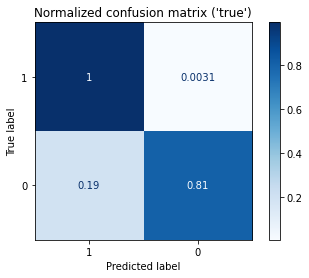

In [77]:
#CONFUSION MATRIX TRAIN SET
titles_options = [("Confusion Matrix", None),
                  ("Normalized confusion matrix ('all')", 'all'),
                  ("Normalized confusion matrix ('true')", 'true')]

for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf_kn, X_train, y_train,
                                 display_labels=None,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize,labels=[1,0])
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Confusion Matrix
[[832   5]
 [201 636]]
Normalized Confusion Matrix ('all')
[[0.49701314 0.00298686]
 [0.12007168 0.37992832]]
Normalized Confusion Matrix ('true')
[[0.99402628 0.00597372]
 [0.24014337 0.75985663]]


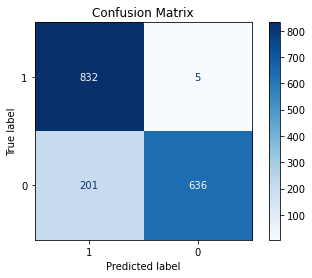

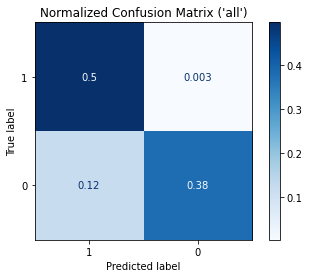

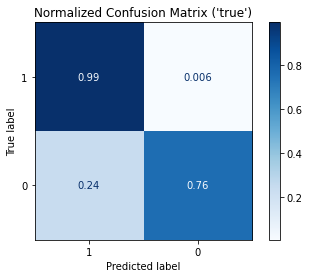

In [81]:
#CONFUSION MATRIX VALIDATION SET
titles_options =[("Confusion Matrix", None),
                  ("Normalized Confusion Matrix ('all')", 'all'),
                  ("Normalized Confusion Matrix ('true')", 'true')]

for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf_kn, X_val, y_val,
                                 display_labels=None,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize,labels=[1,0])
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

# THE BEST

## Random Forest Classifier on Test set

In [82]:
#y_pred_or_fn = clf_rf.predict(X_training)

In [83]:
y_pred_test_fn = clf_rf.predict(X_test)

In [84]:
print('Accuracy %s' % accuracy_score(y_test, y_pred_test_fn))
print('F1-score %s' % f1_score(y_test, y_pred_test_fn, average=None))
print(classification_report(y_test, y_pred_test_fn))
confusion_matrix(y_test, y_pred_test_fn)

Accuracy 0.8723241590214067
F1-score [0.9289664  0.36981132]
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1197
           1       0.32      0.44      0.37       111

    accuracy                           0.87      1308
   macro avg       0.63      0.68      0.65      1308
weighted avg       0.89      0.87      0.88      1308



array([[1092,  105],
       [  62,   49]], dtype=int64)

Confusion Matrix
[[  38   73]
 [ 163 1034]]
Normalized Confusion Matrix ('all')
[[0.02905199 0.0558104 ]
 [0.12461774 0.79051988]]
Normalized Confusion Matrix ('true')
[[0.34234234 0.65765766]
 [0.13617377 0.86382623]]


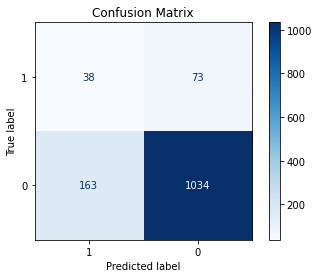

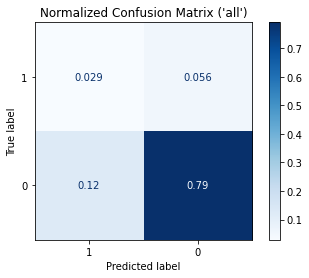

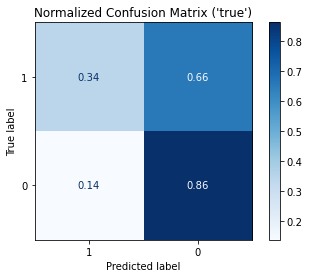

In [86]:
titles_options =[("Confusion Matrix", None),
                  ("Normalized Confusion Matrix ('all')", 'all'),
                  ("Normalized Confusion Matrix ('true')", 'true')]

for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=None,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize,labels=[1,0])
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()